We consider the connectivities of three spatial transcriptomics datasets, one from Zebrafish embryo, taken from [Satija et al. (2015)](https://doi.org/10.1038/nbt.3192); one from Drosophila embryo, pulled from [Karaiskos et al. (2017)](https://science.sciencemag.org/content/358/6360/194.full); and one from the Mouse brain cortex, from [Rodriques et al. (2019)](https://science.sciencemag.org/content/363/6434/1463.full). 

These are datafiles that Zixuan kindly gave to us, to see what the underlying spatial connectivity looks like for 'real' biological tissue. We will try and determine what are appropriate measures to then benchmark cell-cell communication methods, such as those used in SoptSC. 

In [1]:
# Load the relevant libraries
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx
import collections
import itertools
from sklearn.neighbors import kneighbors_graph

Let us load the three datasets now. These are just the spatial coordinates of the tissue samples. Let's also try and plot the point cloud data to see what it looks like.

In [2]:
drosophila_positions = np.loadtxt("/Users/axelalmet/Documents/SpatialData/dm_geometry.txt", skiprows = 1) # Load the Drosophila data
zebrafish_positions = np.loadtxt("/Users/axelalmet/Documents/SpatialData/zf_geometry.txt", skiprows = 1) # Load the Zebrafish data
mouse_positions = np.loadtxt("/Users/axelalmet/Documents/SpatialData/slideseq-mouse-olfactory_bulb/positions.csv", skiprows = 1) # Load the mouse data

In [77]:
# Calculate the kNN graphs for each of the positions, using k = 20
num_neighbours = 20
drosophila_positions_knn = kneighbors_graph(drosophila_positions, num_neighbours, mode='distance')
zebrafish_positions_knn = kneighbors_graph(zebrafish_positions, num_neighbours, mode='distance')
mouse_positions_knn = kneighbors_graph(mouse_positions, num_neighbours, mode='distance')

Text(0, 0.5, 'y')

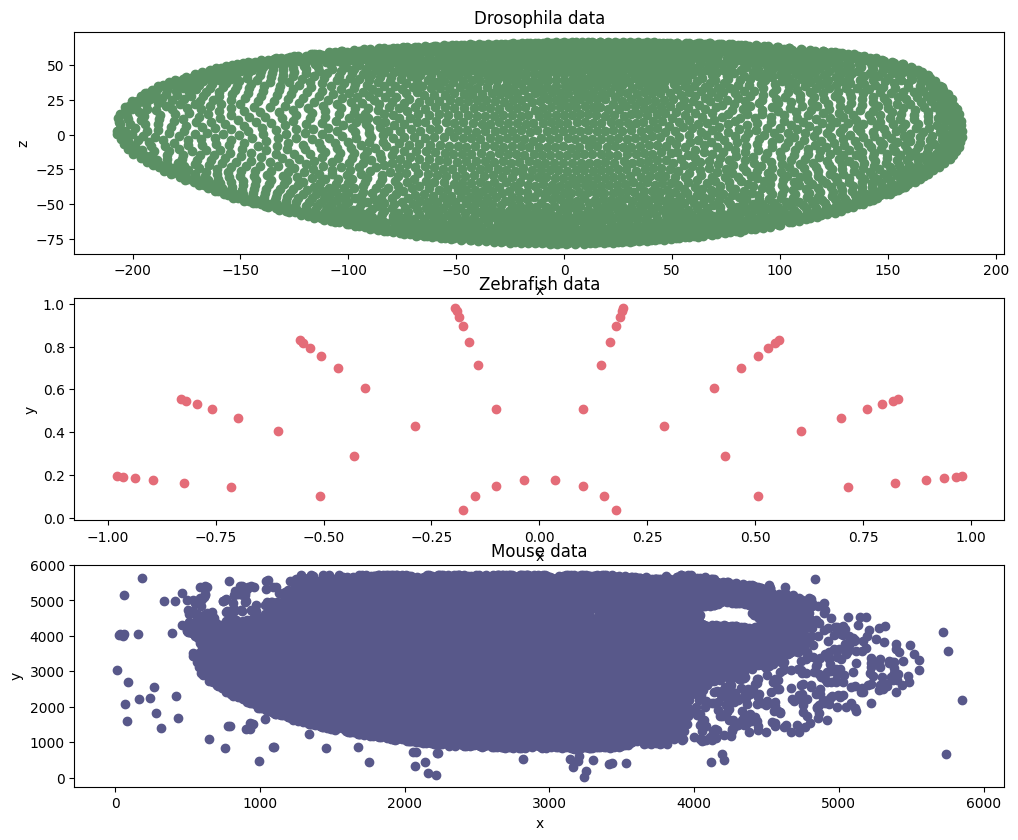

In [78]:
fig=plt.figure(figsize=(12,10), dpi= 100, facecolor='w', edgecolor='k')

# Plot the drosophila data
plt.subplot(311)
plt.scatter(drosophila_positions[:,0], drosophila_positions[:,2], color="#5B9064") # Plot the x-z data to get full 2D scope
plt.title("Drosophila data")
plt.xlabel("x")
plt.ylabel("z")

# Plot the zebrafish data
plt.subplot(312)
plt.scatter(zebrafish_positions[:,0], zebrafish_positions[:,1], color="#E46C78") # Plot the x-y data
plt.title("Zebrafish data")
plt.xlabel("x")
plt.ylabel("y")

# Plot the mouse data
plt.subplot(313)
plt.scatter(mouse_positions[:,0], mouse_positions[:,1], color="#58588A") # Plot the x-y data
plt.title("Mouse data")
plt.xlabel("x")
plt.ylabel("y")

Let us now generate the equivalent networks, based on a threshold distance, (roughly 1-2 cells apart). 

In [79]:
drosophila_network = nx.from_scipy_sparse_matrix(drosophila_positions_knn, edge_attribute='distance')
zebrafish_network = nx.from_scipy_sparse_matrix(zebrafish_positions_knn, edge_attribute='distance')
mouse_network = nx.from_scipy_sparse_matrix(mouse_positions_knn, edge_attribute='distance')

In [80]:
# We also set the nodes to have the attributes as positions
for edge in drosophila_network.edges:
    u, v = edge # Get the node indices
    
    # Get the positions of the nodes
    u_pos = drosophila_positions[u,:]
    v_pos = drosophila_positions[v,:]
    uv_dist = np.linalg.norm(u_pos - v_pos, 2) # Calculate the distance between the positions
    
    # Set the node attributes
    nx.set_node_attributes(drosophila_network, {u: {"pos":u_pos}})
    nx.set_node_attributes(drosophila_network, {v: {"pos":v_pos}})
    
for edge in zebrafish_network.edges:
    u, v = edge # Get the node indices
    
    # Get the positions of the nodes
    u_pos = zebrafish_positions[u,:]
    v_pos = zebrafish_positions[v,:]
    uv_dist = np.linalg.norm(u_pos - v_pos, 2) # Calculate the distance between the positions
    
    # Set the node attributes
    nx.set_node_attributes(zebrafish_network, {u: {"pos":u_pos}})
    nx.set_node_attributes(zebrafish_network, {v: {"pos":v_pos}})
    
for edge in mouse_network.edges:
    u, v = edge # Get the node indices
    
    # Get the positions of the nodes
    u_pos = mouse_positions[u,:]
    v_pos = mouse_positions[v,:]
    uv_dist = np.linalg.norm(u_pos - v_pos, 2) # Calculate the distance between the positions
    
    # Set the node attributes
    nx.set_node_attributes(mouse_network, {u: {"pos":u_pos}})
    nx.set_node_attributes(mouse_network, {v: {"pos":v_pos}})

We now look at the degree distributions and other measurements of these spatial networks.

Text(0.5, 0, 'Degree')

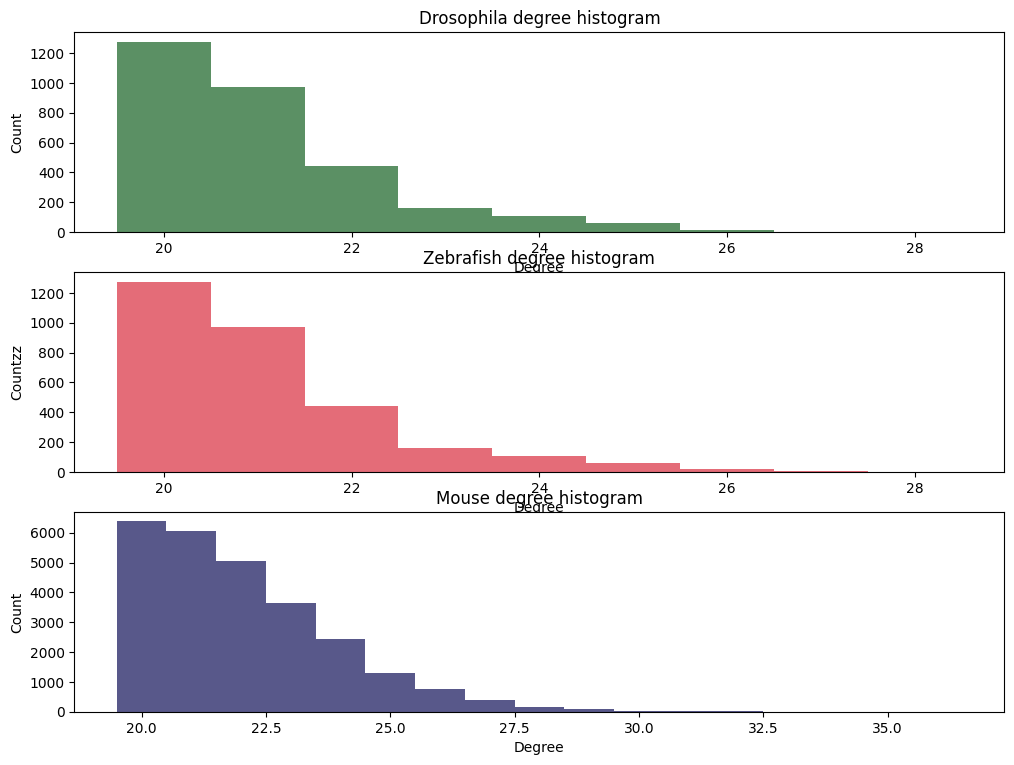

In [81]:
# Degree sequence for the drosophila data
drosophila_degree_sequence = sorted([d for n, d in drosophila_network.degree()], reverse=True)  # degree sequence
drosophilaDegreeCount = collections.Counter(drosophila_degree_sequence)
drosophila_deg, drosophila_cnt = zip(*drosophilaDegreeCount.items())
# Degree sequence for the zebrafish data
zebrafish_degree_sequence = sorted([d for n, d in zebrafish_network.degree()], reverse=True)  # degree sequence
zebrafishDegreeCount = collections.Counter(zebrafish_degree_sequence)
zebrafish_deg, zebrafish_cnt = zip(*zebrafishDegreeCount.items())

# Degree sequence for the mouse data
mouse_degree_sequence = sorted([d for n, d in mouse_network.degree()], reverse=True)  # degree sequence
mouseDegreeCount = collections.Counter(mouse_degree_sequence)
mouse_deg, mouse_cnt = zip(*mouseDegreeCount.items())

fig=plt.figure(figsize=(12,9), dpi= 100, facecolor='w', edgecolor='k')

# Plot the degree histograms
plt.subplot(311)
plt.bar(drosophila_deg, drosophila_cnt, width=1, color="#5B9064")
plt.title("Drosophila degree histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
# plt.ylim((0, 50))

plt.subplot(312)
plt.bar(drosophila_deg, drosophila_cnt, width=1, color="#E46C78")
plt.title("Zebrafish degree histogram")
plt.ylabel("Countzz")
plt.xlabel("Degree")
# plt.ylim((0, 50))

plt.subplot(313)
plt.bar(mouse_deg, mouse_cnt, width=1, color="#58588A")
plt.title("Mouse degree histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
# plt.ylim((0, 50))